In [1]:
%matplotlib inline
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
import os

PREPROCCESSED_DATA_DIR = '../data/preprocess_data'

In [2]:
def get_frame_id(fname):
    return fname.split("--")[1].split('.')[0]

def get_track_id(fname):
    return fname.split("--")[0].split('bee')[1]

def get_name(fname):
    return fname.split('/')[-1]

In [3]:
images = io.imread_collection("../data/clean_raw/bee*")

## Count Bees By Frames

In [4]:
bees_count_by_frame = dict()
for fname in images.files:
    frame = get_frame_id(fname)
    if frame in bees_count_by_frame:
        bees_count_by_frame[frame] += 1
    else:
        bees_count_by_frame[frame] = 1

In [5]:
frames_bee_count = list()
for key, val in bees_count_by_frame.items():
#     print(key, val)
    frames_bee_count.append(val)
frames_bee_count = np.array(frames_bee_count)

In [6]:
# sorted(bees_count_by_frame.keys())

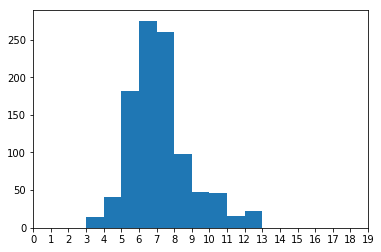

In [7]:
plt.hist(frames_bee_count, bins=10)
plt.xticks(np.arange(20));

## Count Bees by Tracks

In [8]:
bees_count_by_track = dict()
for fname in images.files:
    track = get_track_id(fname)
    if track in bees_count_by_track:
        bees_count_by_track[track] += 1
    else:
        bees_count_by_track[track] = 1

In [9]:
tracks_bee_count = list()
for key, val in bees_count_by_track.items():
#     print(key, val)
    tracks_bee_count.append(val)
tracks_bee_count = np.array(tracks_bee_count)

In [10]:
# sorted(bees_count_by_track.keys())

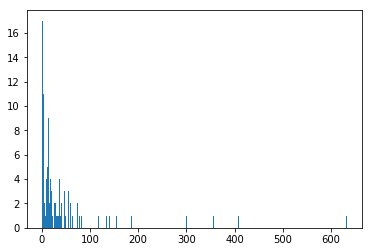

In [11]:
plt.hist(tracks_bee_count, bins=600);
# plt.xticks(np.arange(20));

In [12]:
tracks_count_by_frame = dict()
for fname in images.files:
    frame = get_frame_id(fname)
    track = get_track_id(fname)
    if frame in tracks_count_by_frame:
        tracks_count_by_frame[frame]['count'] += 1
        if tracks_count_by_frame[frame]['min'] >  bees_count_by_track[track]:
            tracks_count_by_frame[frame]['min'] = bees_count_by_track[track]
        if tracks_count_by_frame[frame]['max'] <  bees_count_by_track[track]:
            tracks_count_by_frame[frame]['max'] = bees_count_by_track[track]
    else:
        tracks_count_by_frame[frame] = {'count': 1, 'min': bees_count_by_track[track], 'max': bees_count_by_track[track]}

In [13]:
for k, v in tracks_count_by_frame.items():
    if v['min'] < 40:
        continue
    if v['count'] < 10:
        continue
    print(k, v)

In [14]:
ids = [get_track_id(fname) for fname in images.files if get_frame_id(fname) == "0846"]
amount = [bees_count_by_track[i] for i in ids]

In [15]:
for i, a in zip(ids, amount):
    print(i,a)

0099 632
0196 333
0226 187
0235 54
0240 41
0248 48


In [16]:
del ids[0] # appears in the first tracks and last ones but not in between

In [17]:
ids

['0196', '0226', '0235', '0240', '0248']

In [18]:
ids_frames = dict()

for fname in images.files:
    track = get_track_id(fname)
    frame = get_frame_id(fname)
    
    if track not in ids:
        continue
    
    if track in ids_frames:
        ids_frames[track].append(frame)
    else:
        ids_frames[track] = list([frame])
        

In [19]:
train_frames = dict()

for k, val in ids_frames.items():
    train_frames[k] = sorted(val)[:20]

In [20]:
# train_frames

In [21]:
test_frames = dict()

for k, val in ids_frames.items():
    test_frames[k] = sorted(val)[-20:]

In [22]:
# test_frames

In [23]:
train_id_data_path = os.path.join(PREPROCCESSED_DATA_DIR, 'train_data', 'id')

if not os.path.isdir(train_id_data_path):
    os.mkdir(train_id_data_path)

In [24]:
for img, fname in zip(images, images.files):
    frame = get_frame_id(fname)
    track = get_track_id(fname)
    
    if track not in ids:
        continue
    
    if frame not in train_frames[track]:
        continue
    
    filepath = os.path.join(train_id_data_path, get_name(fname))
    
    io.imsave(filepath, img)

       

In [25]:
test_id_data_path = os.path.join(PREPROCCESSED_DATA_DIR, 'test_data', 'id')

if not os.path.isdir(test_id_data_path):
    os.mkdir(test_id_data_path)

In [26]:
for img, fname in zip(images, images.files):
    frame = get_frame_id(fname)
    track = get_track_id(fname)
    
    if track not in ids:
        continue
    
    if frame not in test_frames[track]:
        continue
    
    filepath = os.path.join(test_id_data_path, get_name(fname))
    
    io.imsave(filepath, img)

       